## **Setup & Load the Data**
---

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import pytz
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

In [4]:
# Load a CSV file from your local file system
df = pd.read_csv('C:/Users/Admin/OneDrive/10 Academy/Week 1/Technical Content/Data/raw_analyst_ratings_cleaned.csv')
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


---
## **Descriptive Statistics**

### **1.Headline Length:**

count    1.407327e+06
mean     7.312053e+01
std      4.073532e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


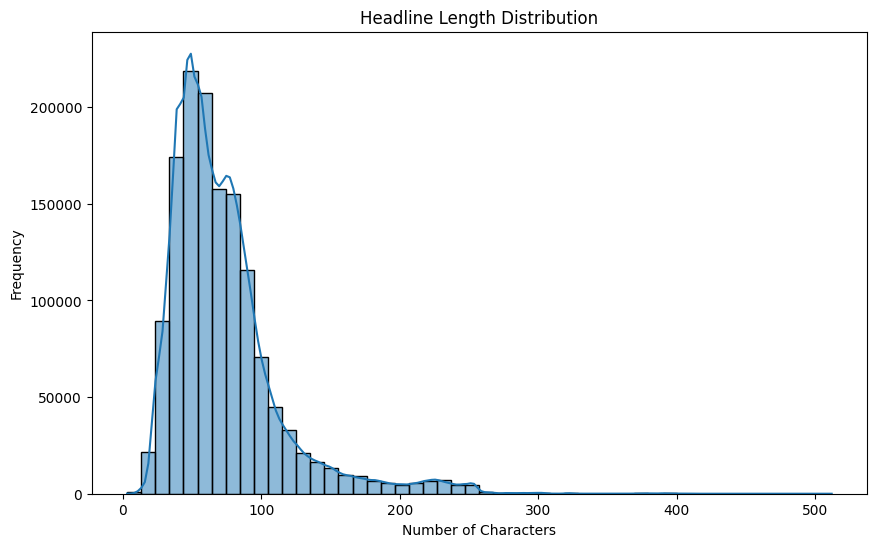

In [8]:
# Create a column for headline lengths
df['headline_length'] = df['headline'].apply(lambda x: len(str(x)))

# Basic statistics
print(df['headline_length'].describe())

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=50, kde=True)
plt.title('Headline Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

### **Summary of Headline Length Descriptive Statistics**

- **Count:** 1,407,327 headlines analyzed  
- **Mean (Average) Length:** ~73 characters  
- **Standard Deviation:** ~41 characters  
- **Minimum Length:** 3 characters  
- **25th Percentile (Q1):** 47 characters  
- **Median (50th Percentile):** 64 characters  
- **75th Percentile (Q3):** 87 characters  
- **Maximum Length:** 512 characters  

These statistics indicate that most headlines are between 47 and 87 characters long, with a small number of very short or very long headlines.

---

### **Articles per Publisher:**

publisher
Paul Quintaro        228373
Lisa Levin           186978
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


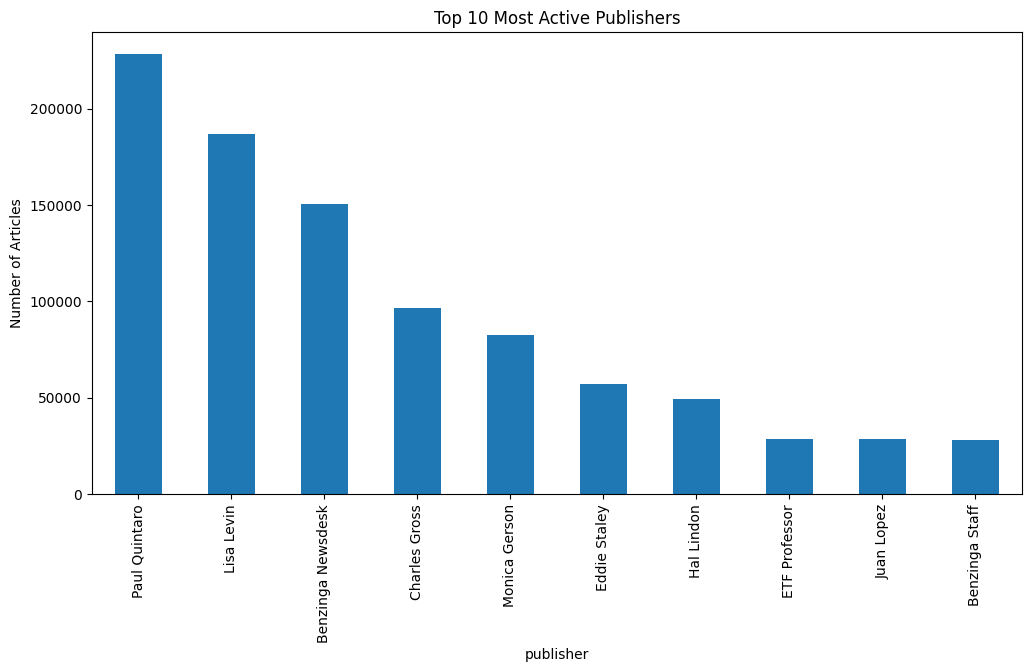

In [9]:
# Count the number of articles by publisher
publisher_counts = df['publisher'].value_counts()

# Display top 10 publishers
print(publisher_counts.head(10))

# Plot
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Active Publishers')
plt.ylabel('Number of Articles')
plt.show()

### **Summary of Articles per Publisher**

- The dataset contains articles from **1,034 unique publishers**.
- The most prolific publisher is **Paul Quintaro** with **228,373 articles**.
- Other top publishers include:
    - **Lisa Levin:** 186,978 articles
    - **Benzinga Newsdesk:** 150,484 articles
    - **Charles Gross:** 96,732 articles
    - **Monica Gerson:** 82,380 articles
- The distribution is highly skewed, with a few publishers contributing a large portion of the articles, while many publishers have only a handful of articles.
- This indicates a concentration of content among a small group of highly active publishers.

---

### **Publication Date Trends:**

In [30]:
# Ensure index is datetime and timezone-aware, then extract date
if not pd.api.types.is_datetime64_any_dtype(df.index):
	df.index = pd.to_datetime(df.index)

# Localize naive datetimes to UTC, keep tz-aware as is
if df.index.tz is None:
	df.index = df.index.tz_localize('UTC')

df['date_only'] = df.index.date
df['date_only'] = df['date_only'].astype(str)  # Optional: convert to string for easier display/plotting
df.head()

ValueError: Cannot mix tz-aware with tz-naive values, at position 10